In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import style
import sklearn as sk
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import quandl, math, datetime
import pandas as pd
import numpy as np
import pickle

style.use('ggplot')

In [21]:
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [22]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']=(df['Adj. High'] - df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change']=(df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']*100.0


In [23]:
print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0   
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0   
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0   
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0   
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0   

              HL_PCT  PCT_change  
Date                              
2004-08-19  3.712563    0.324968  
2004-08-20  0.710922    7.227007  
2004-08-23  3.729433   -1.227880  
2004-08-24  6.417469   -5.726357  
2004-08-25  1.886792    1.183658  


In [24]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)


print(df.head())


            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0   
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0   
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0   
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0   
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0   

              HL_PCT  PCT_change       label  
Date                                          
2004-08-19  3.712563    0.324968  214.005615  
2004-08-20  0.710922    7.227007  210.725489  
2004-08-23  3.729433   -1.227880  208.072299  
2004-08-24  6.417469   -5.726357  218.288837  
2004-08-25  1.886792    1.183658  223.309335  


In [25]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]




df.dropna(inplace=True)
Y = np.array(df['label'])

print(len(X),len(Y))

3081 3081


In [26]:
X_train,X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)
#retrain like once a month
with open('linearegression.pickle','wb') as f:
    pickle.dump(clf,f)

pickle_in = open('linearegression.pickle','rb')
clf = pickle.load(pickle_in)

acc = clf.score(X_test,Y_test)

print(acc)
print(forecast_out)


0.8795894505911135
343


In [27]:
# svm

X_train,X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2)
clf2 = svm.SVR()
clf2.fit(X_train, Y_train)

acc2 = clf2.score(X_test,Y_test)

print(acc)
print(forecast_out)

/Users/computerscience/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8795894505911135
343


In [28]:
forecast_set = clf.predict(X_lately)
print(forecast_set,acc, forecast_out)

[ 985.78742888  930.18904433  955.18368668  991.48212999  999.90040673
  970.02996285  992.95749975  994.57117882  987.86277469 1012.69762724
  935.85275641  993.05281684  970.09881111  952.85639246  959.93080186
  977.36868835  979.2815294   984.25498803 1008.65880875 1019.12054594
 1029.88200216 1012.75209496 1029.16436296 1032.27385187 1032.92465976
 1028.98513575 1052.23772723 1046.65553903 1048.27842028 1040.80221778
 1024.20776513 1030.72982162 1031.04200163 1008.40979396 1010.00634416
 1031.36323343 1039.61861705 1020.65563118 1059.1953466  1065.08353779
 1069.10533117 1069.62492914 1069.29687118 1071.96477694 1078.7966345
 1049.43732896 1077.99493763 1049.145868   1088.17976157 1100.57378112
 1098.33298052 1027.28614673 1041.12727953 1049.8144163  1042.45756
 1025.64863195 1051.63912535 1062.05292442 1056.72047504 1061.96524688
 1078.35378457 1072.79559299 1079.61144574 1085.58486794 1077.91595672
 1086.69597616 1086.39882937 1092.42912081 1090.12497317 1097.41942791
 1102.4790

                     Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                           
2017-10-14 17:00:00        NaN        NaN       NaN         NaN          NaN   
2017-10-15 17:00:00        NaN        NaN       NaN         NaN          NaN   
2017-10-16 17:00:00        NaN        NaN       NaN         NaN          NaN   
2017-10-17 17:00:00        NaN        NaN       NaN         NaN          NaN   
2017-10-18 17:00:00        NaN        NaN       NaN         NaN          NaN   

                     HL_PCT  PCT_change  label     Forecast  
Date                                                         
2017-10-14 17:00:00     NaN         NaN    NaN  1339.106975  
2017-10-15 17:00:00     NaN         NaN    NaN  1280.736703  
2017-10-16 17:00:00     NaN         NaN    NaN  1189.133134  
2017-10-17 17:00:00     NaN         NaN    NaN  1290.732222  
2017-10-18 17:00:00     NaN         NaN    NaN  1154.374073  


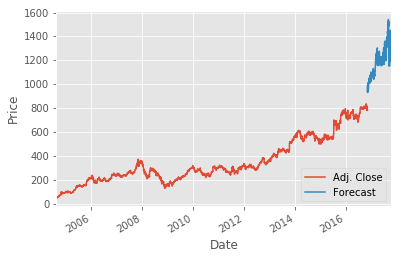

In [29]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.tail()) 
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [30]:
# pickling and scaling
